In [1]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from palmerpenguins import load_penguins

from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
penguin = load_penguins()

penguin = penguin.dropna()

penguin['year'] = penguin['year'].astype(object)

X = penguin.drop(['bill_depth_mm'], axis = 1)
y = penguin['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X,y)

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")

X_train = ct.fit_transform(X_train)
X_test = ct.fit_transform(X_test)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

## Note

I chose to go with the second option of comparing the KNN and decision tree models as mentioned in the discord channel.

In [3]:
en = ElasticNet(alpha = 0.001, l1_ratio = 0.5)

fitted = en.fit(X_train,y_train)

#Test Error
predict1 = fitted.predict(X_test)

MSE1 = mean_squared_error(y_test, predict1)

print(MSE1)

#Training Error
predict11 = fitted.predict(X_train)

MSE11 = mean_squared_error(y_train, predict11)

print(MSE11)

0.6922812883080328
0.5707015300512609


In [4]:
knn = KNeighborsRegressor(n_neighbors=3)

fitted = knn.fit(X_train,y_train)

#Test Error
predict211 = fitted.predict(X_test)

MSE211 = mean_squared_error(y_test, predict211)

print(MSE211)

#Training Error
predict212 = fitted.predict(X_train)

MSE212 = mean_squared_error(y_train, predict212)

print(MSE212)

0.9413888888888889
0.3182909415439535


In [5]:
knn = KNeighborsRegressor(n_neighbors=6)

fitted = knn.fit(X_train,y_train)

#Test Error
predict221 = fitted.predict(X_test)

MSE221 = mean_squared_error(y_test, predict221)

print(MSE221)

#Training Error
predict222 = fitted.predict(X_train)

MSE222 = mean_squared_error(y_train, predict222)

print(MSE222)

0.7794113756613763
0.4073125836680055


In [6]:
knn = KNeighborsRegressor(n_neighbors=12)

fitted = knn.fit(X_train,y_train)

#Test Error
predict231 = fitted.predict(X_test)

MSE231 = mean_squared_error(y_test, predict231)

print(MSE231)

#Training Error
predict232 = fitted.predict(X_train)

MSE232 = mean_squared_error(y_train, predict232)

print(MSE232)

0.7507878637566139
0.5006765952699687


In [7]:
knn = KNeighborsRegressor(n_neighbors=24)

fitted = knn.fit(X_train,y_train)

#Test Error
predict241 = fitted.predict(X_test)

MSE241 = mean_squared_error(y_test, predict241)

print(MSE241)

#Training Error
predict242 = fitted.predict(X_train)

MSE242 = mean_squared_error(y_train, predict242)

print(MSE242)

0.711294849537037
0.5643865740740739


In [8]:
knn = KNeighborsRegressor(n_neighbors=48)

fitted = knn.fit(X_train,y_train)

#Test Error
predict251 = fitted.predict(X_test)

MSE251 = mean_squared_error(y_test, predict251)

print(MSE251)

#Training Error
predict252 = fitted.predict(X_train)

MSE252 = mean_squared_error(y_train, predict252)

print(MSE252)

0.8798499503968253
0.7457008938531908


In [9]:
knn = KNeighborsRegressor(n_neighbors=96)

fitted = knn.fit(X_train,y_train)

#Test Error
predict261 = fitted.predict(X_test)

MSE261 = mean_squared_error(y_test, predict261)

print(MSE261)

#Training Error
predict262 = fitted.predict(X_train)

MSE262 = mean_squared_error(y_train, predict262)

print(MSE262)

1.5557746620783734
1.3319285213771752


In [10]:
dt = DecisionTreeRegressor(max_depth = 1)

fitted = dt.fit(X_train,y_train)

#Test Error
predict = fitted.predict(X_test)

MSE311 = mean_squared_error(y_test, predict)

print(MSE311)

#Training Error
predict = fitted.predict(X_train)

MSE312 = mean_squared_error(y_train, predict)

print(MSE312)

1.3750947755274248
1.212256920401914


In [11]:
dt = DecisionTreeRegressor(max_depth = 2)

fitted = dt.fit(X_train,y_train)

#Test Error
predict = fitted.predict(X_test)

MSE321 = mean_squared_error(y_test, predict)

print(MSE321)

#Training Error
predict = fitted.predict(X_train)

MSE322 = mean_squared_error(y_train, predict)

print(MSE322)

0.7239347270323675
0.673850926794777


In [12]:
dt = DecisionTreeRegressor(max_depth = 4)

fitted = dt.fit(X_train,y_train)

#Test Error
predict = fitted.predict(X_test)

MSE331 = mean_squared_error(y_test, predict)

print(MSE331)

#Training Error
predict = fitted.predict(X_train)

MSE332 = mean_squared_error(y_train, predict)

print(MSE332)

0.8490009139103449
0.4214098674610228


In [13]:
dt = DecisionTreeRegressor(max_depth = 8)

fitted = dt.fit(X_train,y_train)

#Test Error
predict = fitted.predict(X_test)

MSE341 = mean_squared_error(y_test, predict)

print(MSE341)

#Training Error
predict = fitted.predict(X_train)

MSE342 = mean_squared_error(y_train, predict)

print(MSE342)

1.2524769895259686
0.06140653088544655


In [14]:
KNN = pd.DataFrame({'KNN #':[3,6,12,24,48,96], 
                    "KNN MSE1":[MSE211, MSE221, MSE231, MSE241, MSE251, MSE261],
                   "KNN MSE2": [MSE212, MSE222, MSE232, MSE242, MSE252, MSE262]})

Tree = pd.DataFrame({'Tree #':[1,2,4,8], 
                    "Tree MSE1":[MSE311, MSE321, MSE331, MSE341],
                   "Tree MSE2": [MSE312, MSE322, MSE332, MSE342]})
                    

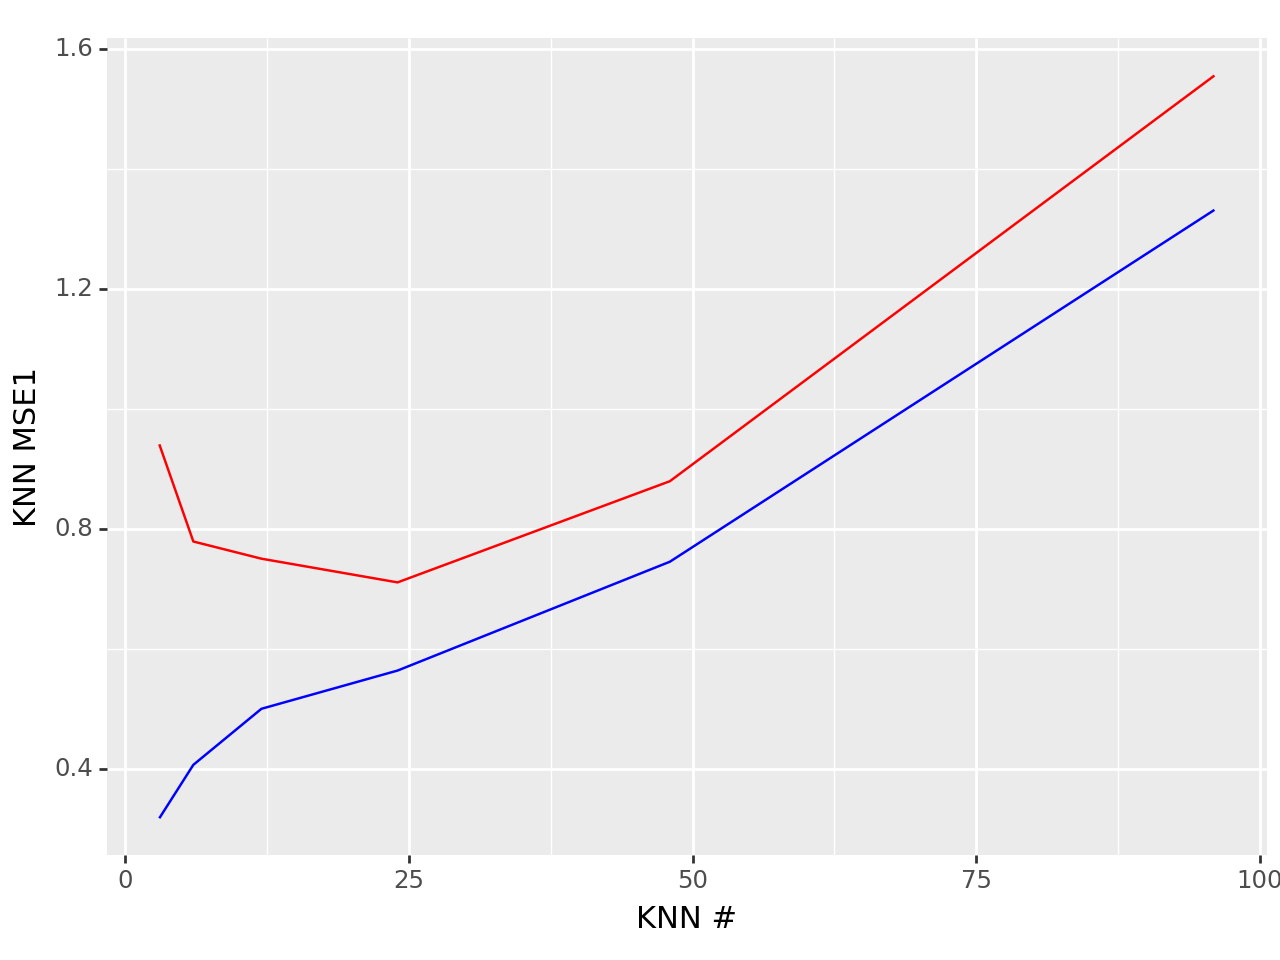

<Figure Size: (640 x 480)>

In [15]:
from plotnine import ggplot, aes, geom_line

(ggplot(KNN)
    + geom_line(aes(x = 'KNN #', y="KNN MSE1"), color = 'red')
    + geom_line(aes(x = 'KNN #', y='KNN MSE2'), color = 'blue'))

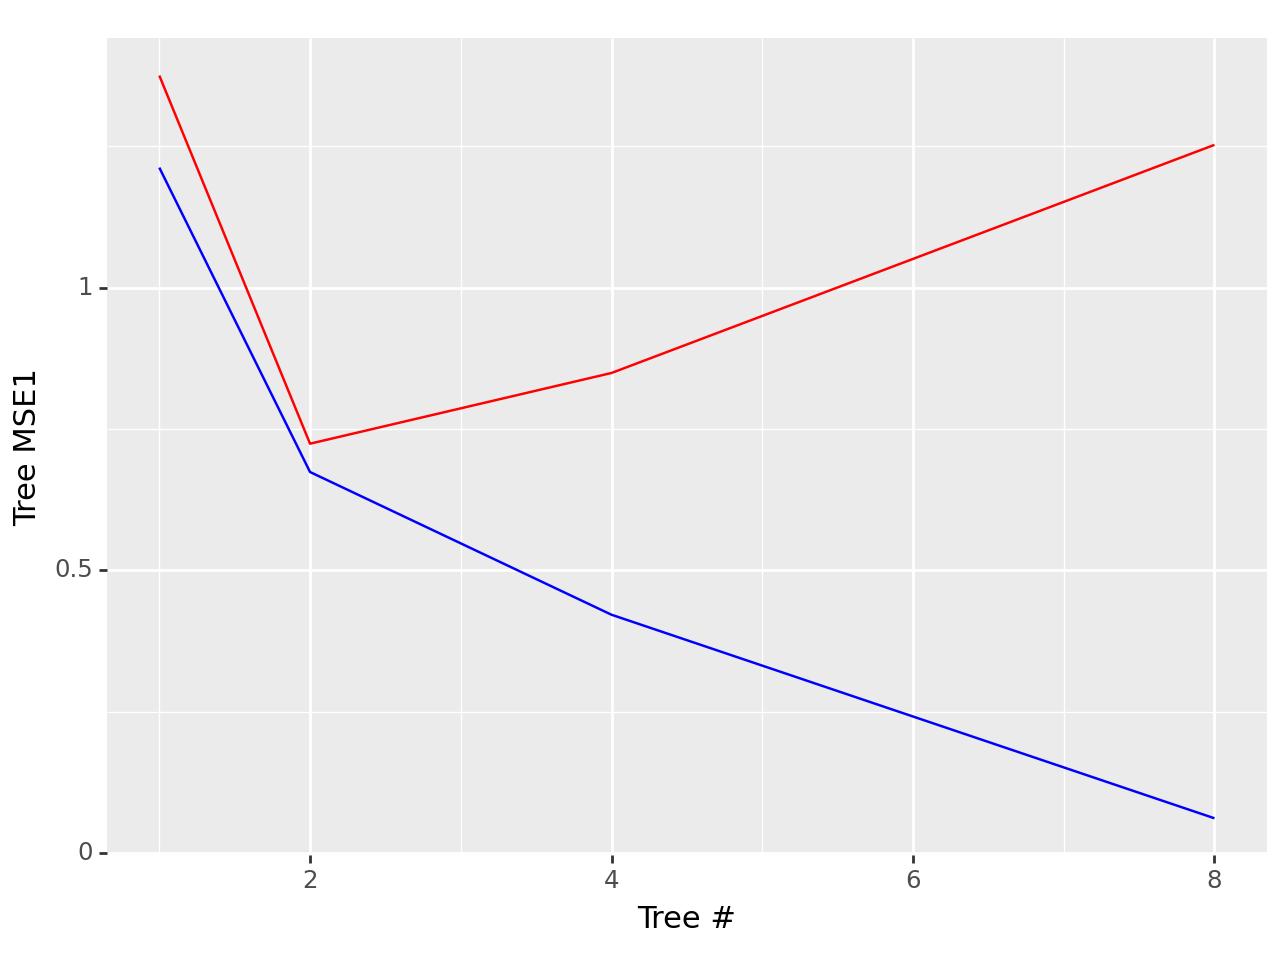

<Figure Size: (640 x 480)>

In [16]:
(ggplot(Tree)
    + geom_line(aes(x = 'Tree #', y="Tree MSE1"), color = 'red')
    + geom_line(aes(x = 'Tree #', y='Tree MSE2'), color = 'blue'))

## Findings:

The models act in an inverese way to each other. the KNN model has a 0 training error when using 1 neighbor as it just matches perfectly to itself, however, as the number of neighbors increase, so does the error of the model. Essentially, the model will overfit at the beginning and then start to underfit the more neighbors are considered. On the decision tree the story is the opposite as the less branches we have the less accurate we can make the predictions, however, as the branches increase, eventually there is a branch for each observation. What is interesting is that in some cases the testing error started to grow as the number of branches increased which is likely due to overfitting